# Convolutional Neural Network Example(Keras)

## MNIST Dataset - CNN

In [21]:
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
np.random.seed(7)

In [22]:
print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.1.0


In [23]:
img_rows = 28
img_cols = 28

batch_size = 128
num_classes = 10
epochs = 5

In [24]:
(x_train, y_train), (x_test, y_test) = load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [26]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## CNN 다이어그램
![nn](./CNN-example-block-diagram.jpg)

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 838us/sample - loss: 0.1861 - accuracy: 0.9432 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 2/12
60000/60000 [==============================] - 50s 833us/sample - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0291 - val_accuracy: 0.9901
Epoch 3/12
60000/60000 [==============================] - 50s 834us/sample - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.0269 - val_accuracy: 0.9907
Epoch 4/12
60000/60000 [==============================] - 50s 835us/sample - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0215 - val_accuracy: 0.9920
Epoch 5/12
60000/60000 [==============================] - 51s 845us/sample - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0257 - val_accuracy: 0.9914
Epoch 6/12
60000/60000 [==============================] - 50s 839us/sample - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0214 - val_accuracy: 0.9933
Epoch 7/12
60000/60000 [====================

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023333671029077505
Test accuracy: 0.9936


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

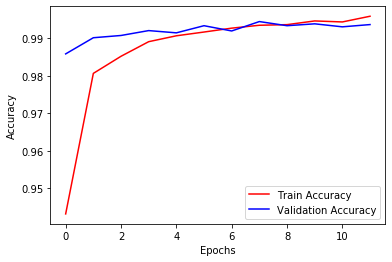

In [38]:
epoch_cnt = range(len(hist.history['accuracy']))

plt.plot(epoch_cnt, hist.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(epoch_cnt, hist.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

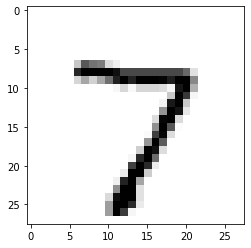

The Answer is  [7]


In [39]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

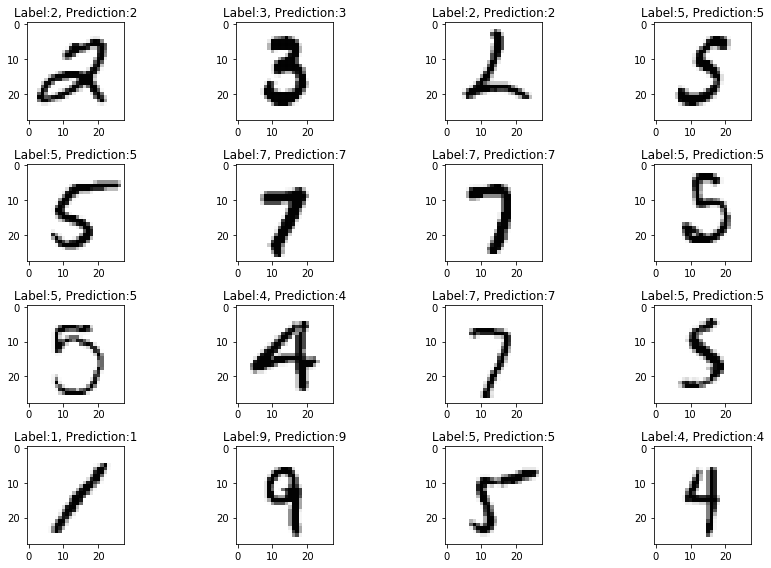

In [41]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []
right_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
    if predicted_labels[n] == test_labels[n]:
        right_result.append(n)

wrong_samples = random.choices(population=wrong_result, k=16)
right_samples = random.choices(population=right_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in right_samples:
#for n in wrong_samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()